# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
filepath = 'data/train.csv'
df = pd.read_csv(filepath)

# EDA(exploratory data analysis)

### explore data
* list a few data: `df.head`
* number of data & number of features: `df.shape`
* list features: `df.columns`
* statistic information
* count missing value
* types of data

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
def stat(df):
    type_list = df.dtypes
    df_stat = pd.DataFrame(type_list,columns=["data types"])
    df_stat['Missing'] = df.isnull().sum()
    df_stat['unique'] = df.nunique()
    return df_stat

df_stat = stat(df).style.background_gradient(cmap='rainbow')
df_stat

,data types,Missing,unique
PassengerId,object,0,8693
HomePlanet,object,201,3
CryoSleep,object,217,2
Cabin,object,199,6560
Destination,object,182,3
Age,float64,179,80
VIP,object,203,2
RoomService,float64,181,1273
FoodCourt,float64,183,1507
ShoppingMall,float64,208,1115


object     7
float64    6
bool       1
dtype: int64

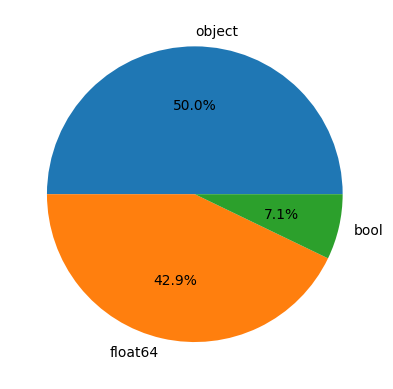

In [19]:
df.dtypes.value_counts().plot(kind="pie",autopct='%.1f%%')
df.dtypes.value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_47532\3404547282.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rainbow')


<Axes: >

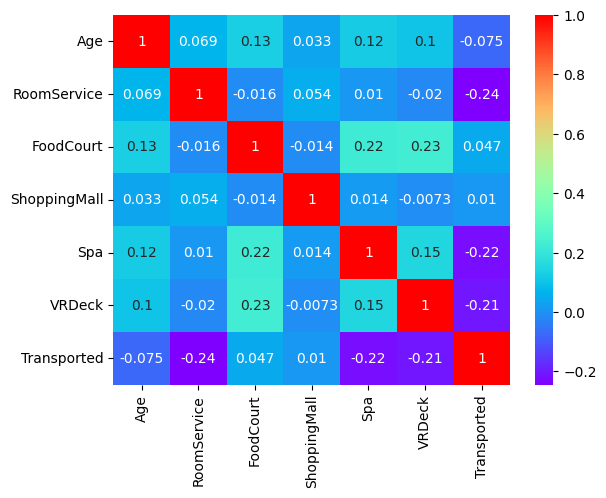

In [73]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

### describe data 
* plot statistic information about each feature
* plot relation between features

In [6]:
df_dropna = df.dropna()
print('Origin: {} | Dropna: {}'.format(df.shape[0], df_dropna.shape[0]))

Origin: 8693 | Dropna: 6606


In [11]:
list(df_dropna.select_dtypes(include=[np.number]).columns.values)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
# 將 figure 實例化到 fig 的變數上，並設定寬與高（此處為預設值）
fig = plt.figure(figsize=(10, 10))

# 將 axe 新增到實例化後 2×2 的 figure 上，並指定第 1,2,3 個
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_1.hist(df['Age'], bins=20, color='k', alpha=0.3)

(6606, 10)
['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


C:\Users\User\AppData\Local\Temp\ipykernel_47532\787341317.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


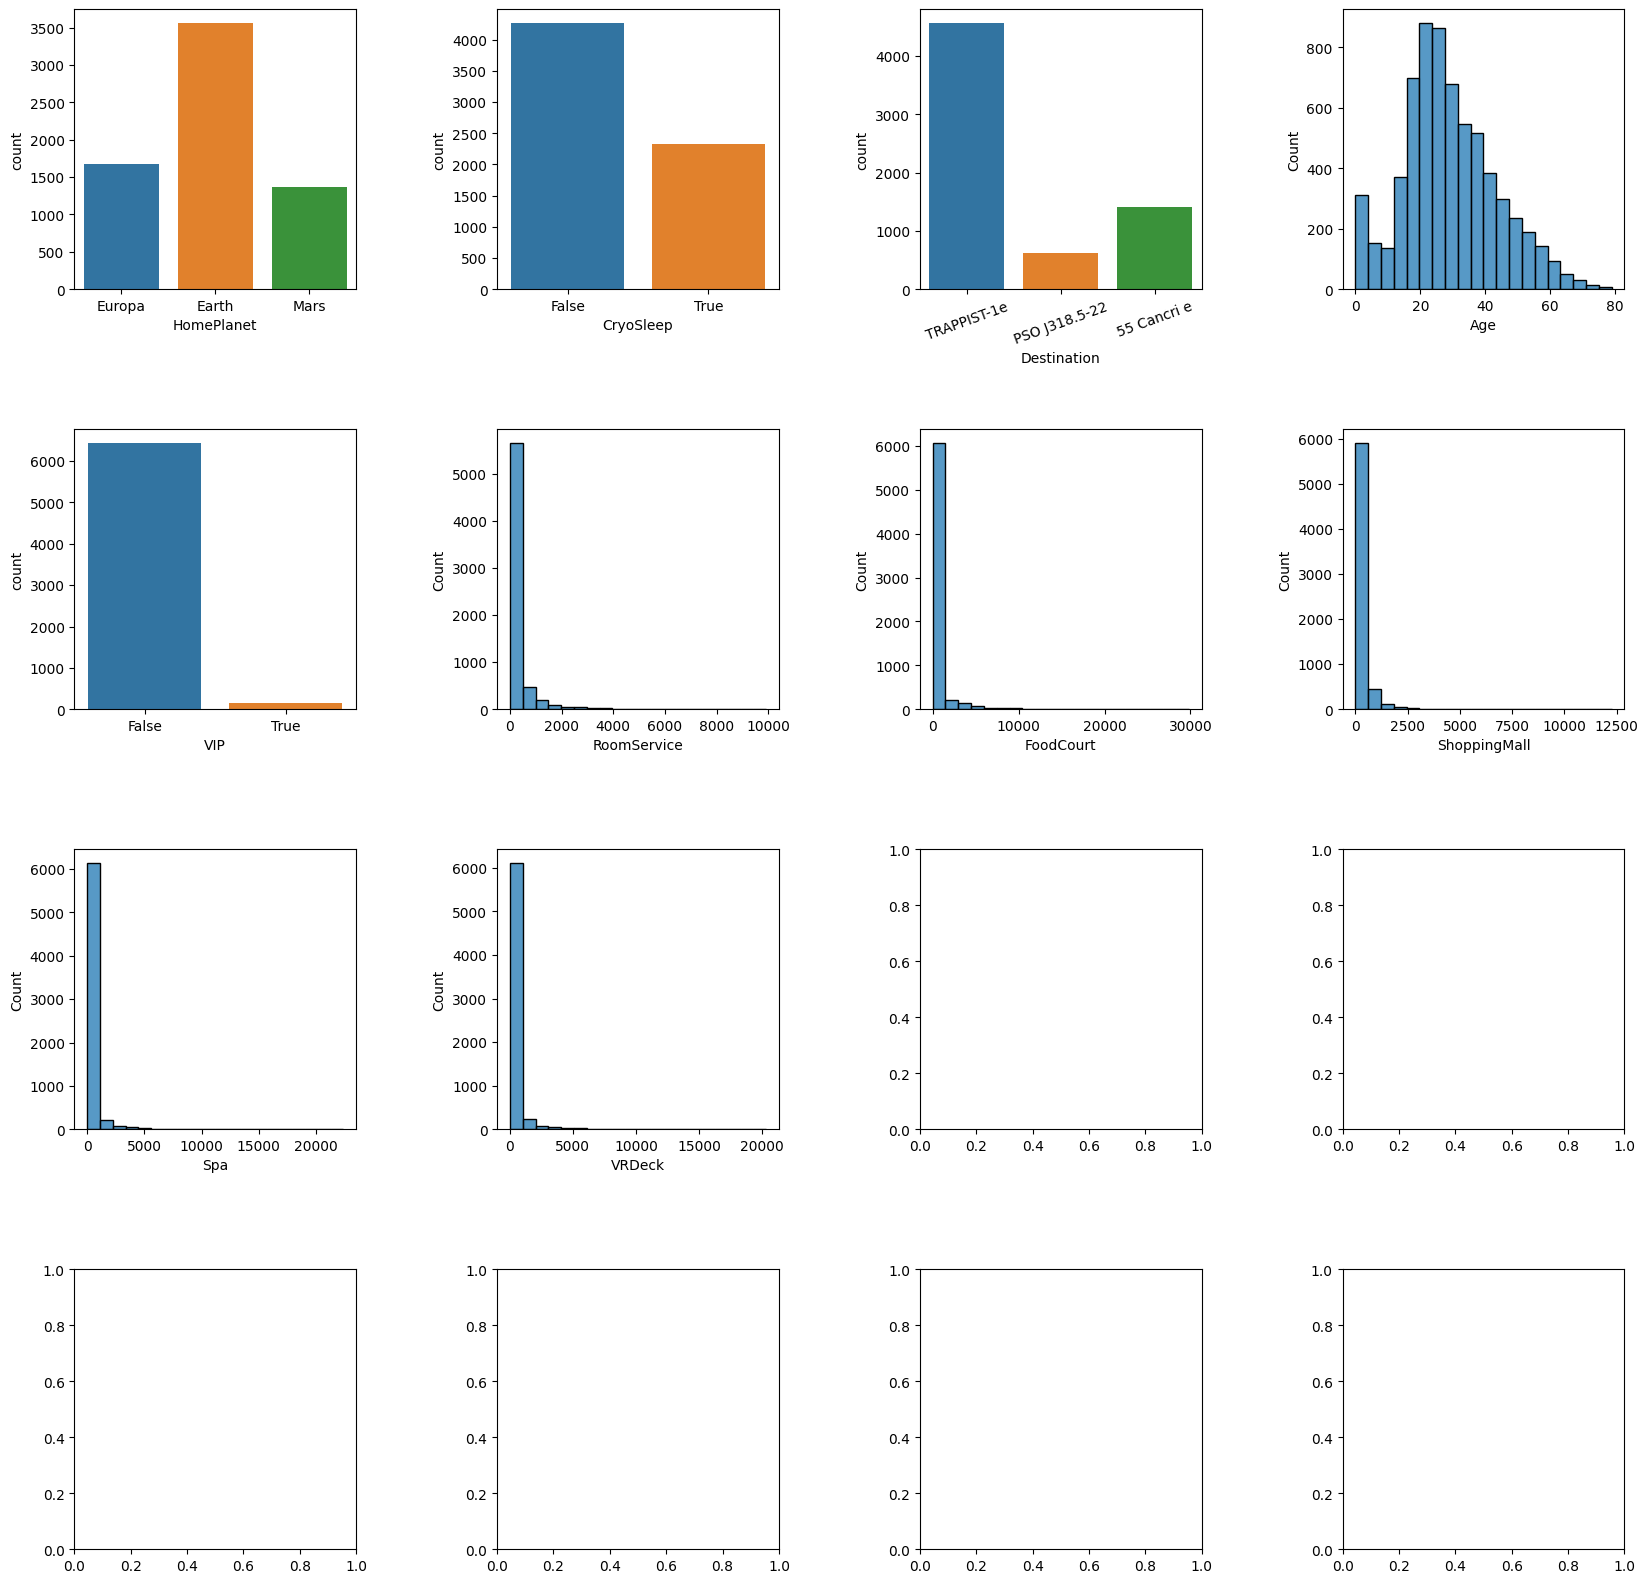

In [34]:
def describe(df: pd.DataFrame):
    """describe data, display: 
    * number/percent of missing value: 
    * unique value: 長條圖for數值型資料 / 圓餅圖for類別型資料
    * pair plot for target
    """
    # count missing
    print(df.shape)
    nrows, ncols = df.shape
    missing = df.isna().sum()
    # missing = missing.apply(lambda x: '{:.2f}'.format(x / nrows))

    # unique value
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    is_numeric_cols = [True if df.columns[i] in numeric_cols else False for i in range(ncols)]
    category_cols = [df.columns[i] for i in range(df.shape[1]) if df.columns[i] not in numeric_cols] # ?
    print(category_cols)
    count_list = [df.iloc[:,i].value_counts() for i in range(df.shape[1]) if df.columns[i] not in numeric_cols] # ?

    # draw
    fig, axes = plt.subplots(4, 4, figsize = (20, 20))
    for i in range(ncols):
        r = i // 4
        c = i % 4
        # print(type(axes))
        # print(type(axes[0, 0]))
        if df.columns[i] in numeric_cols:
            # axes[r, c].hist(df.iloc[:,i], bins=20, color='k', alpha=0.3)
            sns.histplot(ax=axes[r, c], data=df_dropna, x=df.columns[i], bins=20)
            # .set_title(df.columns[i])
        else:
            pass
            # pass
            # axes[r, c].bar(x=df.iloc[:,i].unique(), height=df.iloc[:,i].value_counts())
            sns.countplot(ax=axes[r, c], data=df_dropna, x=df.columns[i])
            # .set_title(df.columns[i])
    
    axes[0, 2].set_xticklabels(labels = df['Destination'].unique(), rotation=20)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    fig.savefig(fname='describe-sns')
    fig.show()
    return

describe(df_dropna.drop(['PassengerId', 'Transported', 'Name', 'Cabin'], axis=1))

C:\Users\User\AppData\Local\Temp\ipykernel_47532\3660603314.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


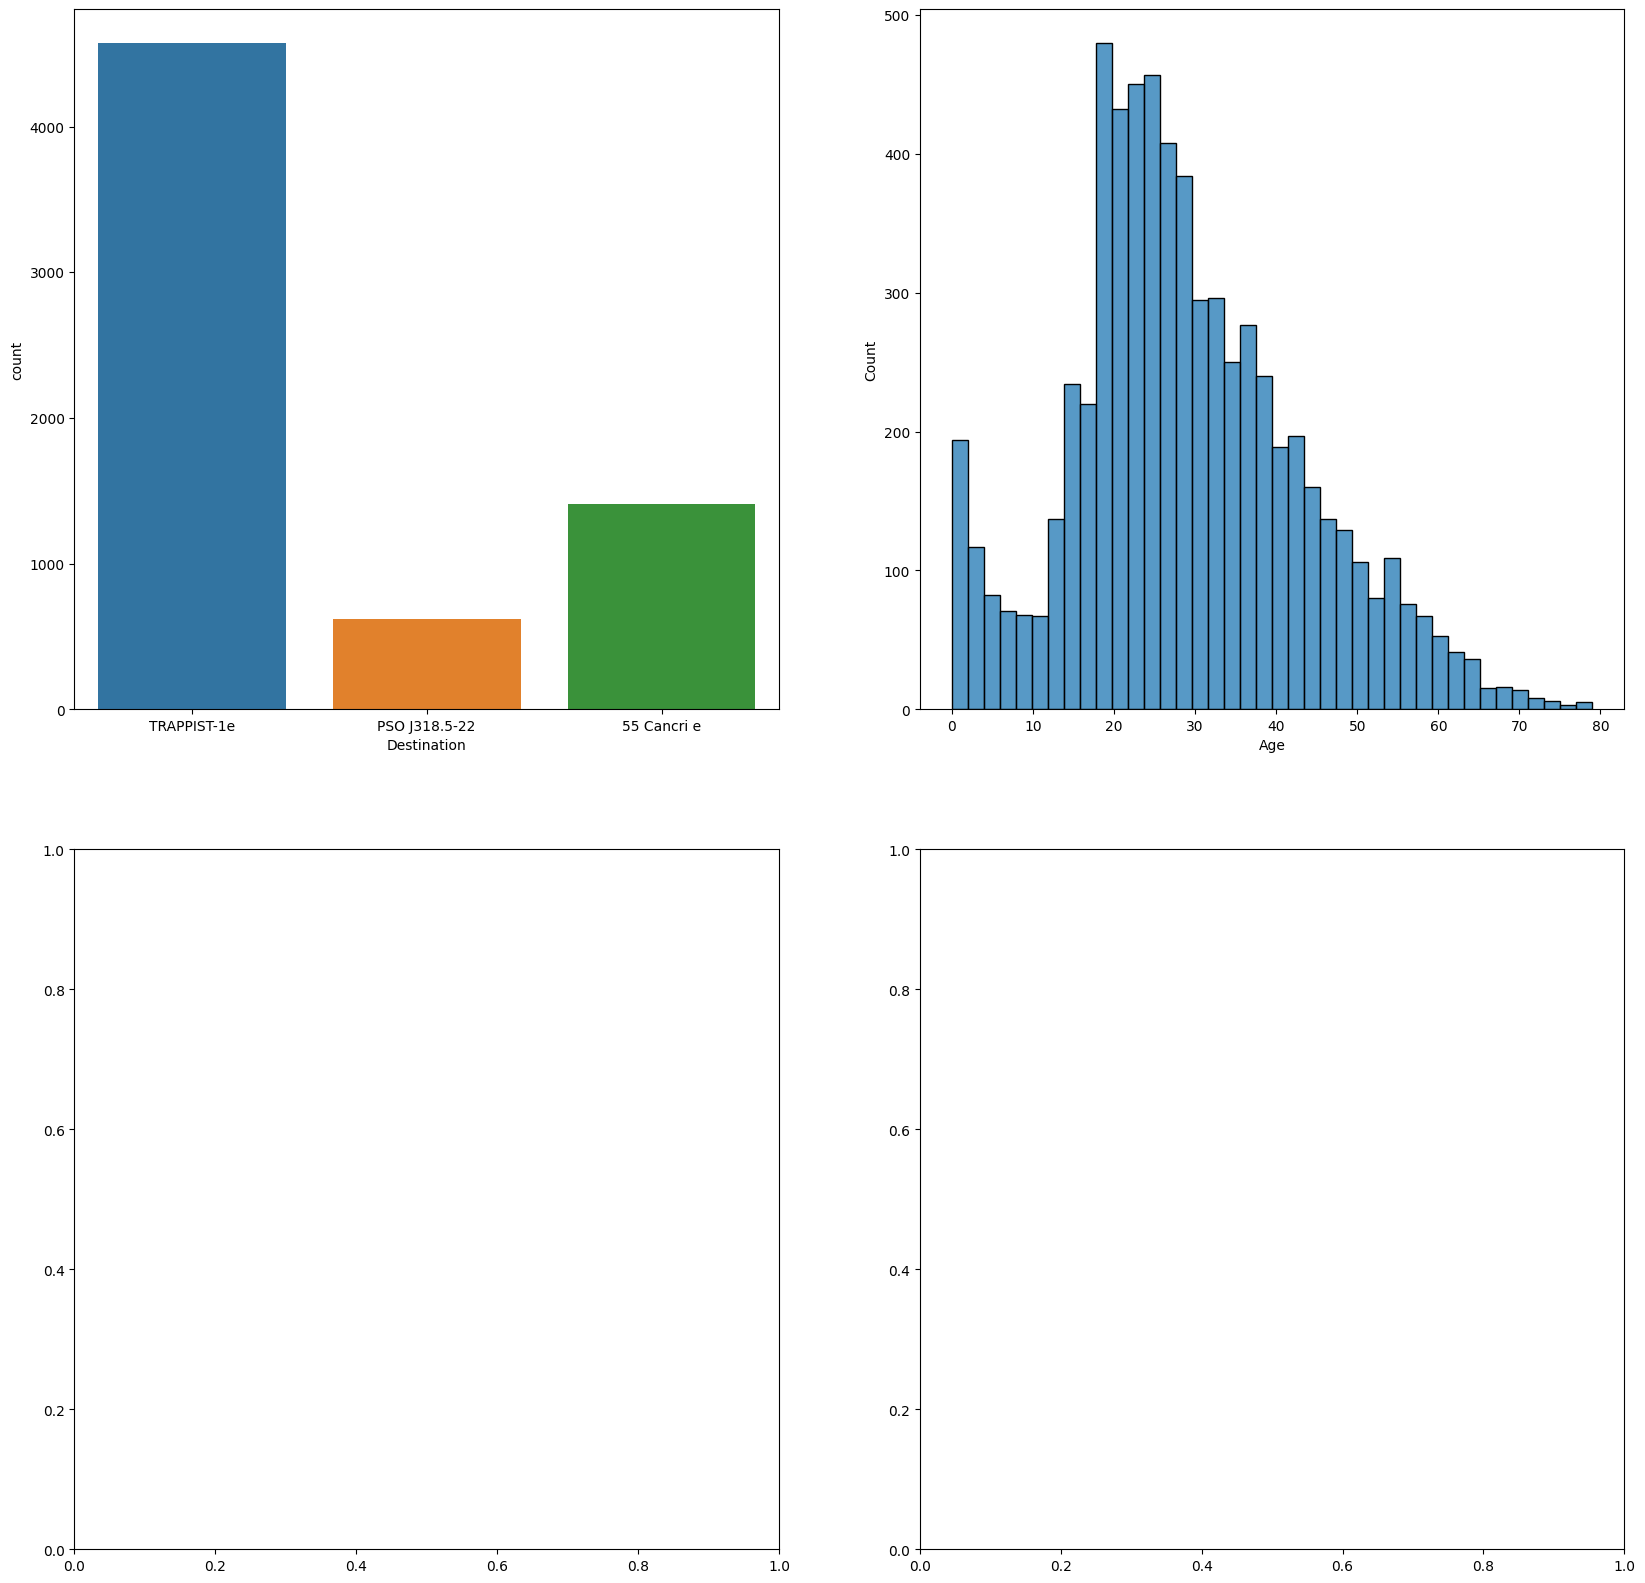

In [23]:
fig, axes = plt.subplots(2,2, figsize=(20, 20))
sns.countplot(ax=axes[0,0], data = df_dropna, x='Destination')
sns.histplot(ax=axes[0,1], data=df_dropna, x='Age')
fig.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


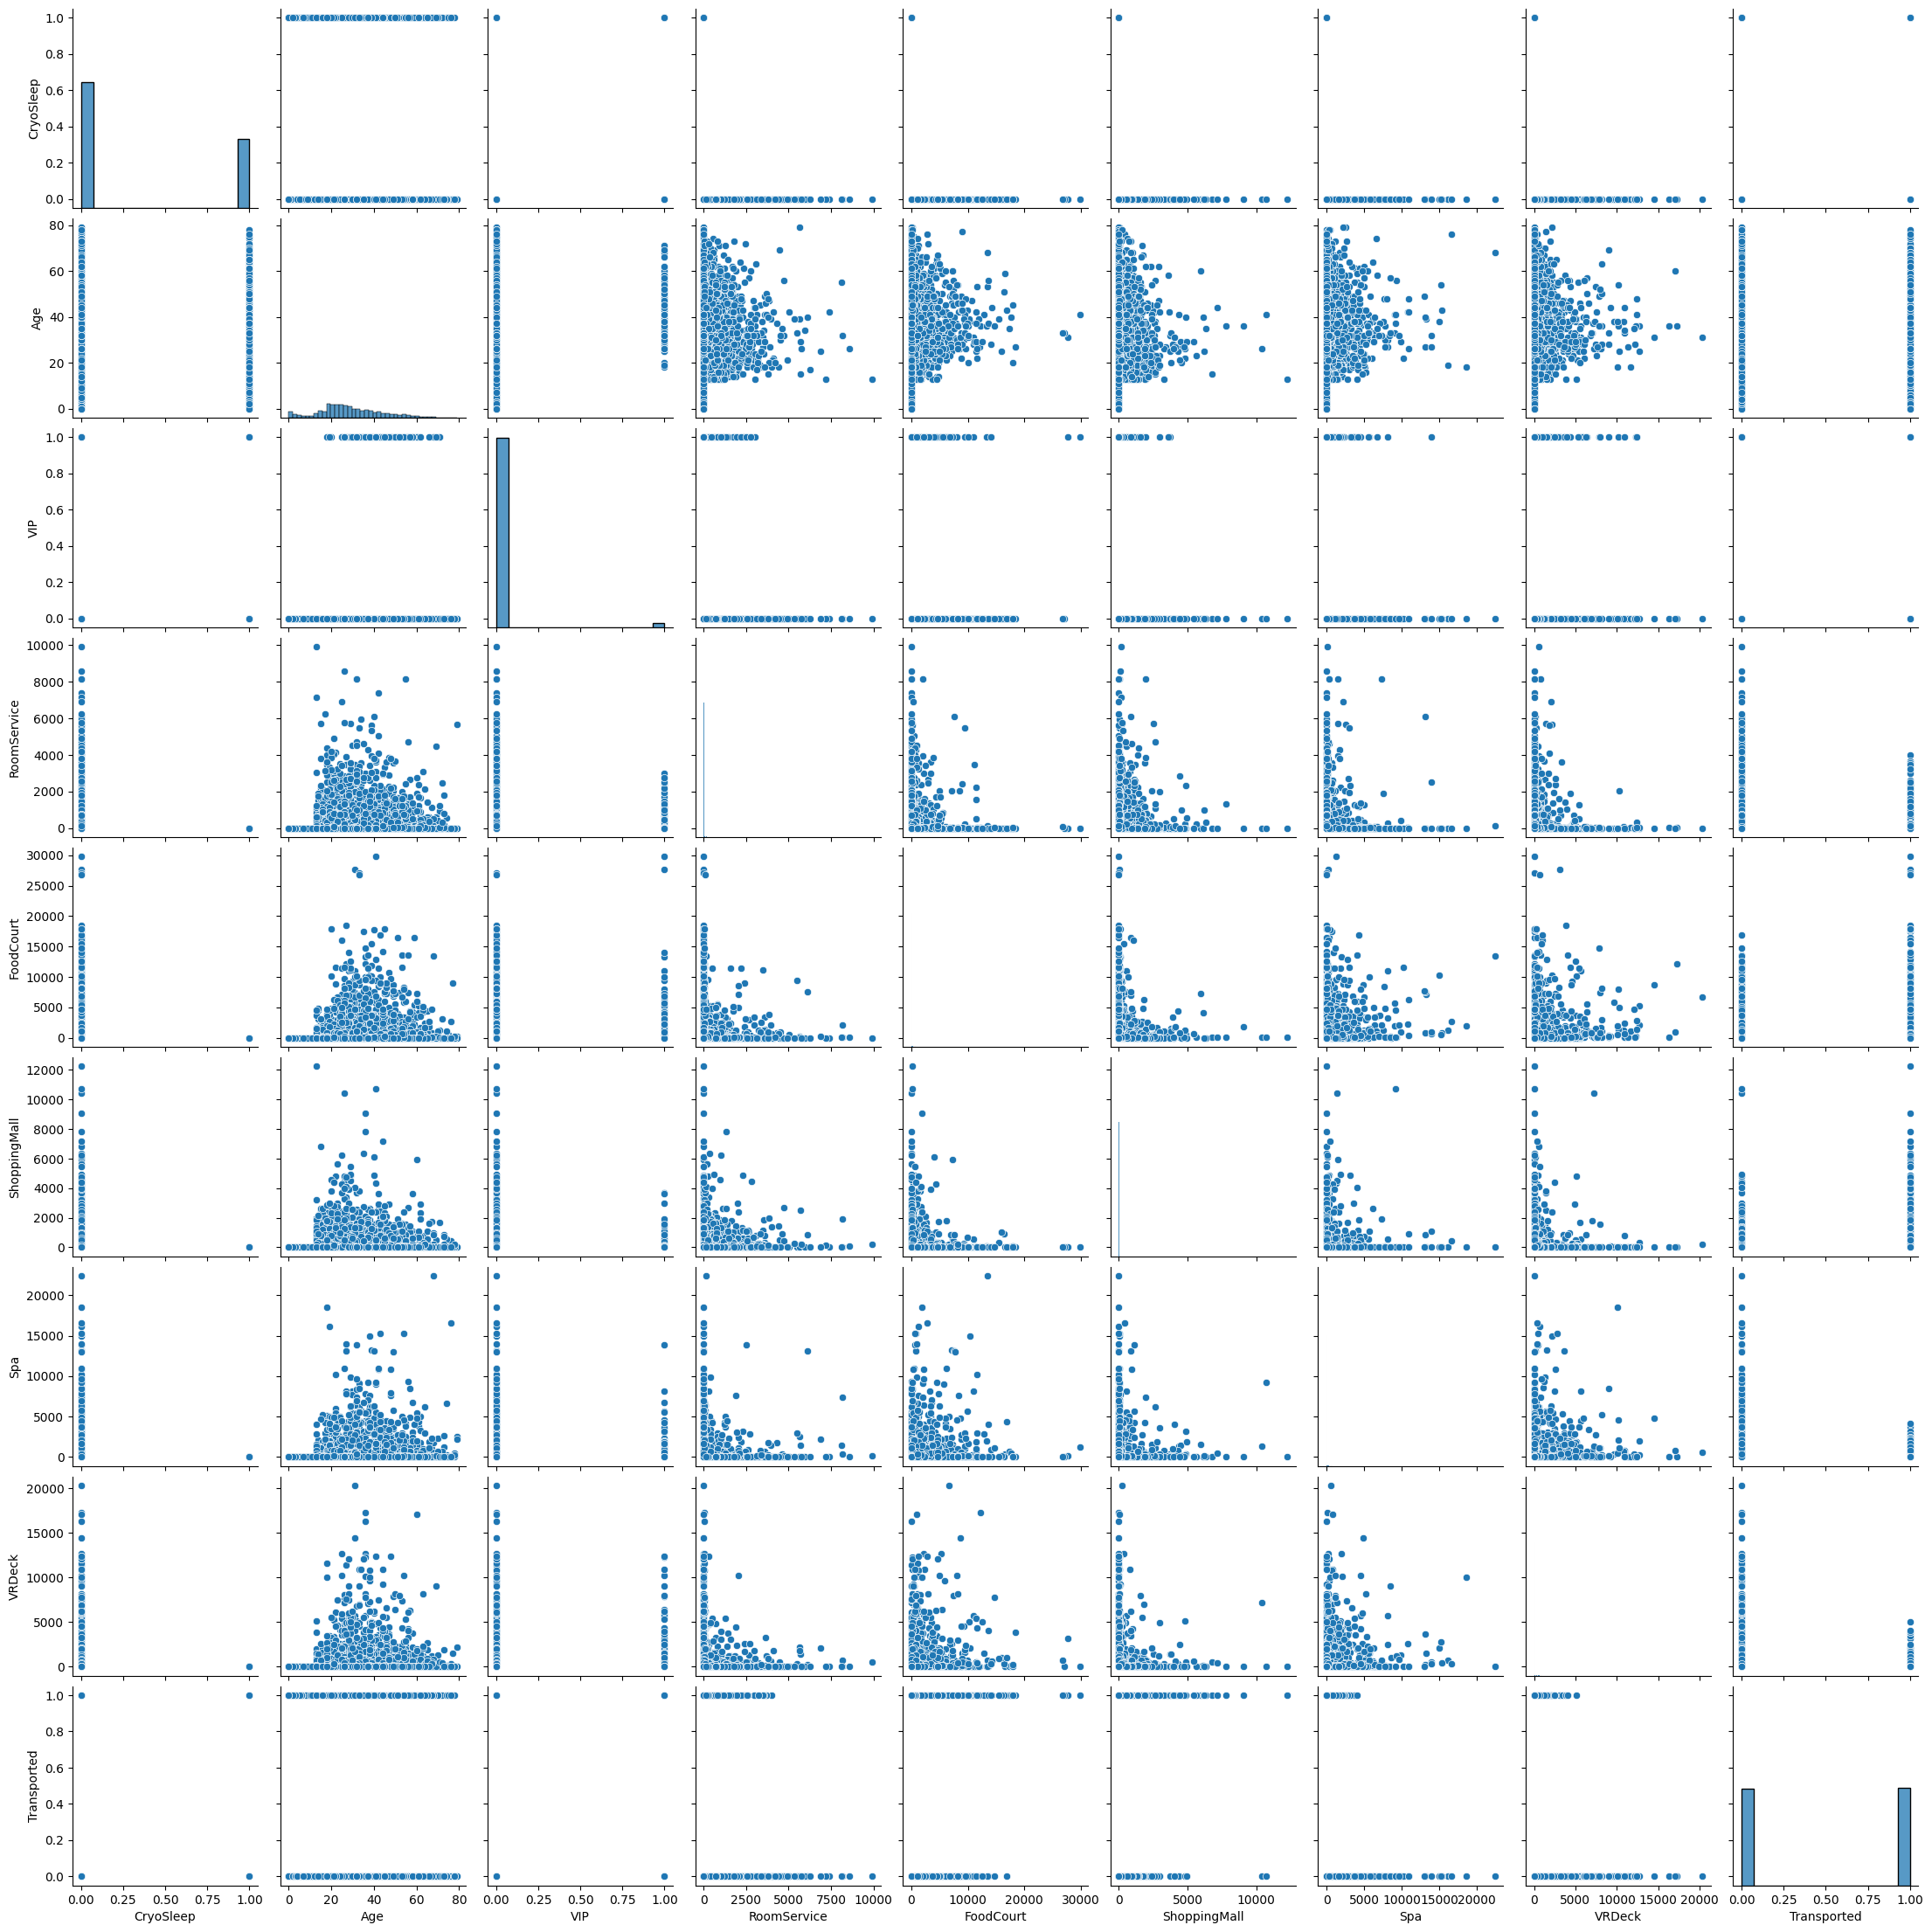

In [41]:
sns.pairplot(df_dropna.drop(['PassengerId', 'Name', 'Cabin'],axis=1), diag_kind='hist')

<Axes: xlabel='VIP', ylabel='count'>

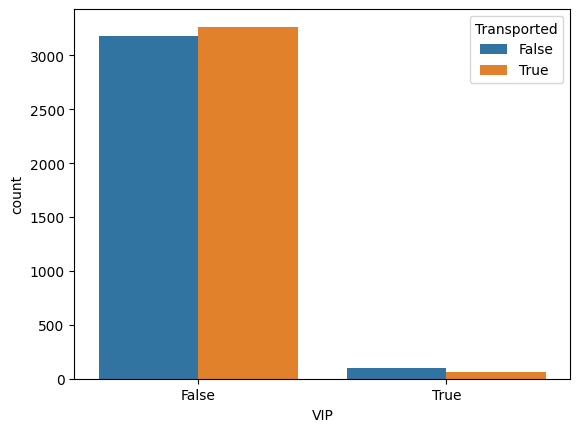

In [43]:
sns.countplot(data=df_dropna, x='VIP', hue='Transported')

<Axes: xlabel='Transported', ylabel='count'>

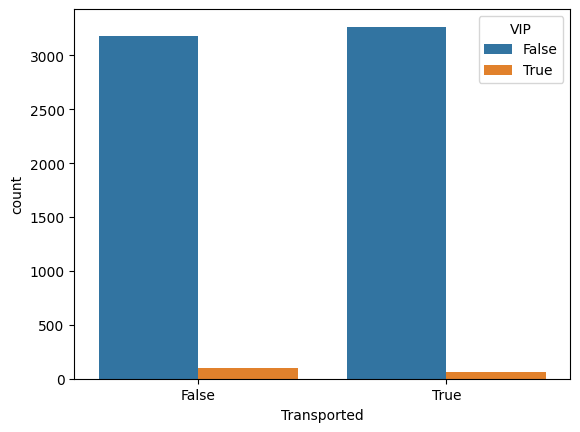

In [44]:
sns.countplot(data=df_dropna, x='Transported', hue='VIP')

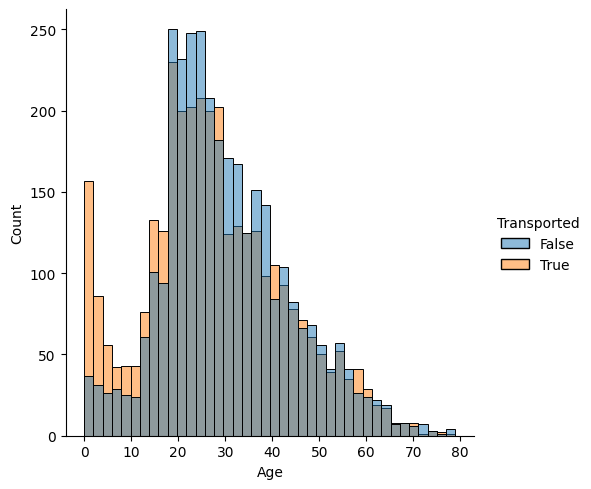

In [63]:
sns.displot(data=df_dropna, x='Age', hue='Transported')

<Axes: xlabel='Age', ylabel='FoodCourt'>

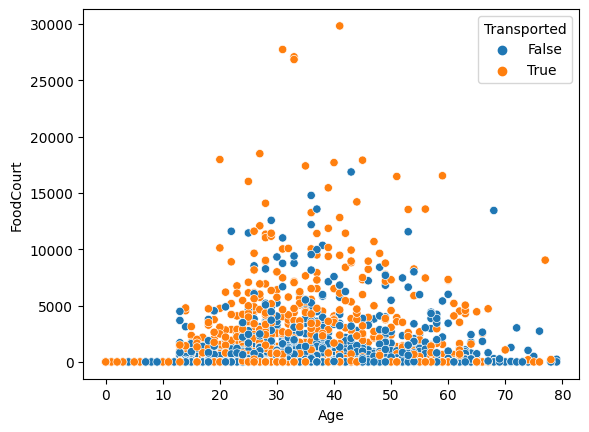

In [65]:
sns.scatterplot(data=df_dropna, x='Age', y='FoodCourt', hue='Transported')

In [9]:
df_dropna.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [63]:
# count missing
print(df.shape)
nrows = df.shape[0]
missing = df.isna().sum()
missing = missing.apply(lambda x: '{:.2f}'.format(x / nrows))

(8693, 14)


In [70]:
# unique value
numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
category_cols = [df.columns for i in range(df.shape[1]) if df.columns[i] not in numeric_cols]
count_list = [df.iloc[:,i].value_counts() for i in range(df.shape[1]) if df.columns[i] not in numeric_cols]
count_list[0]

'PassengerId'

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


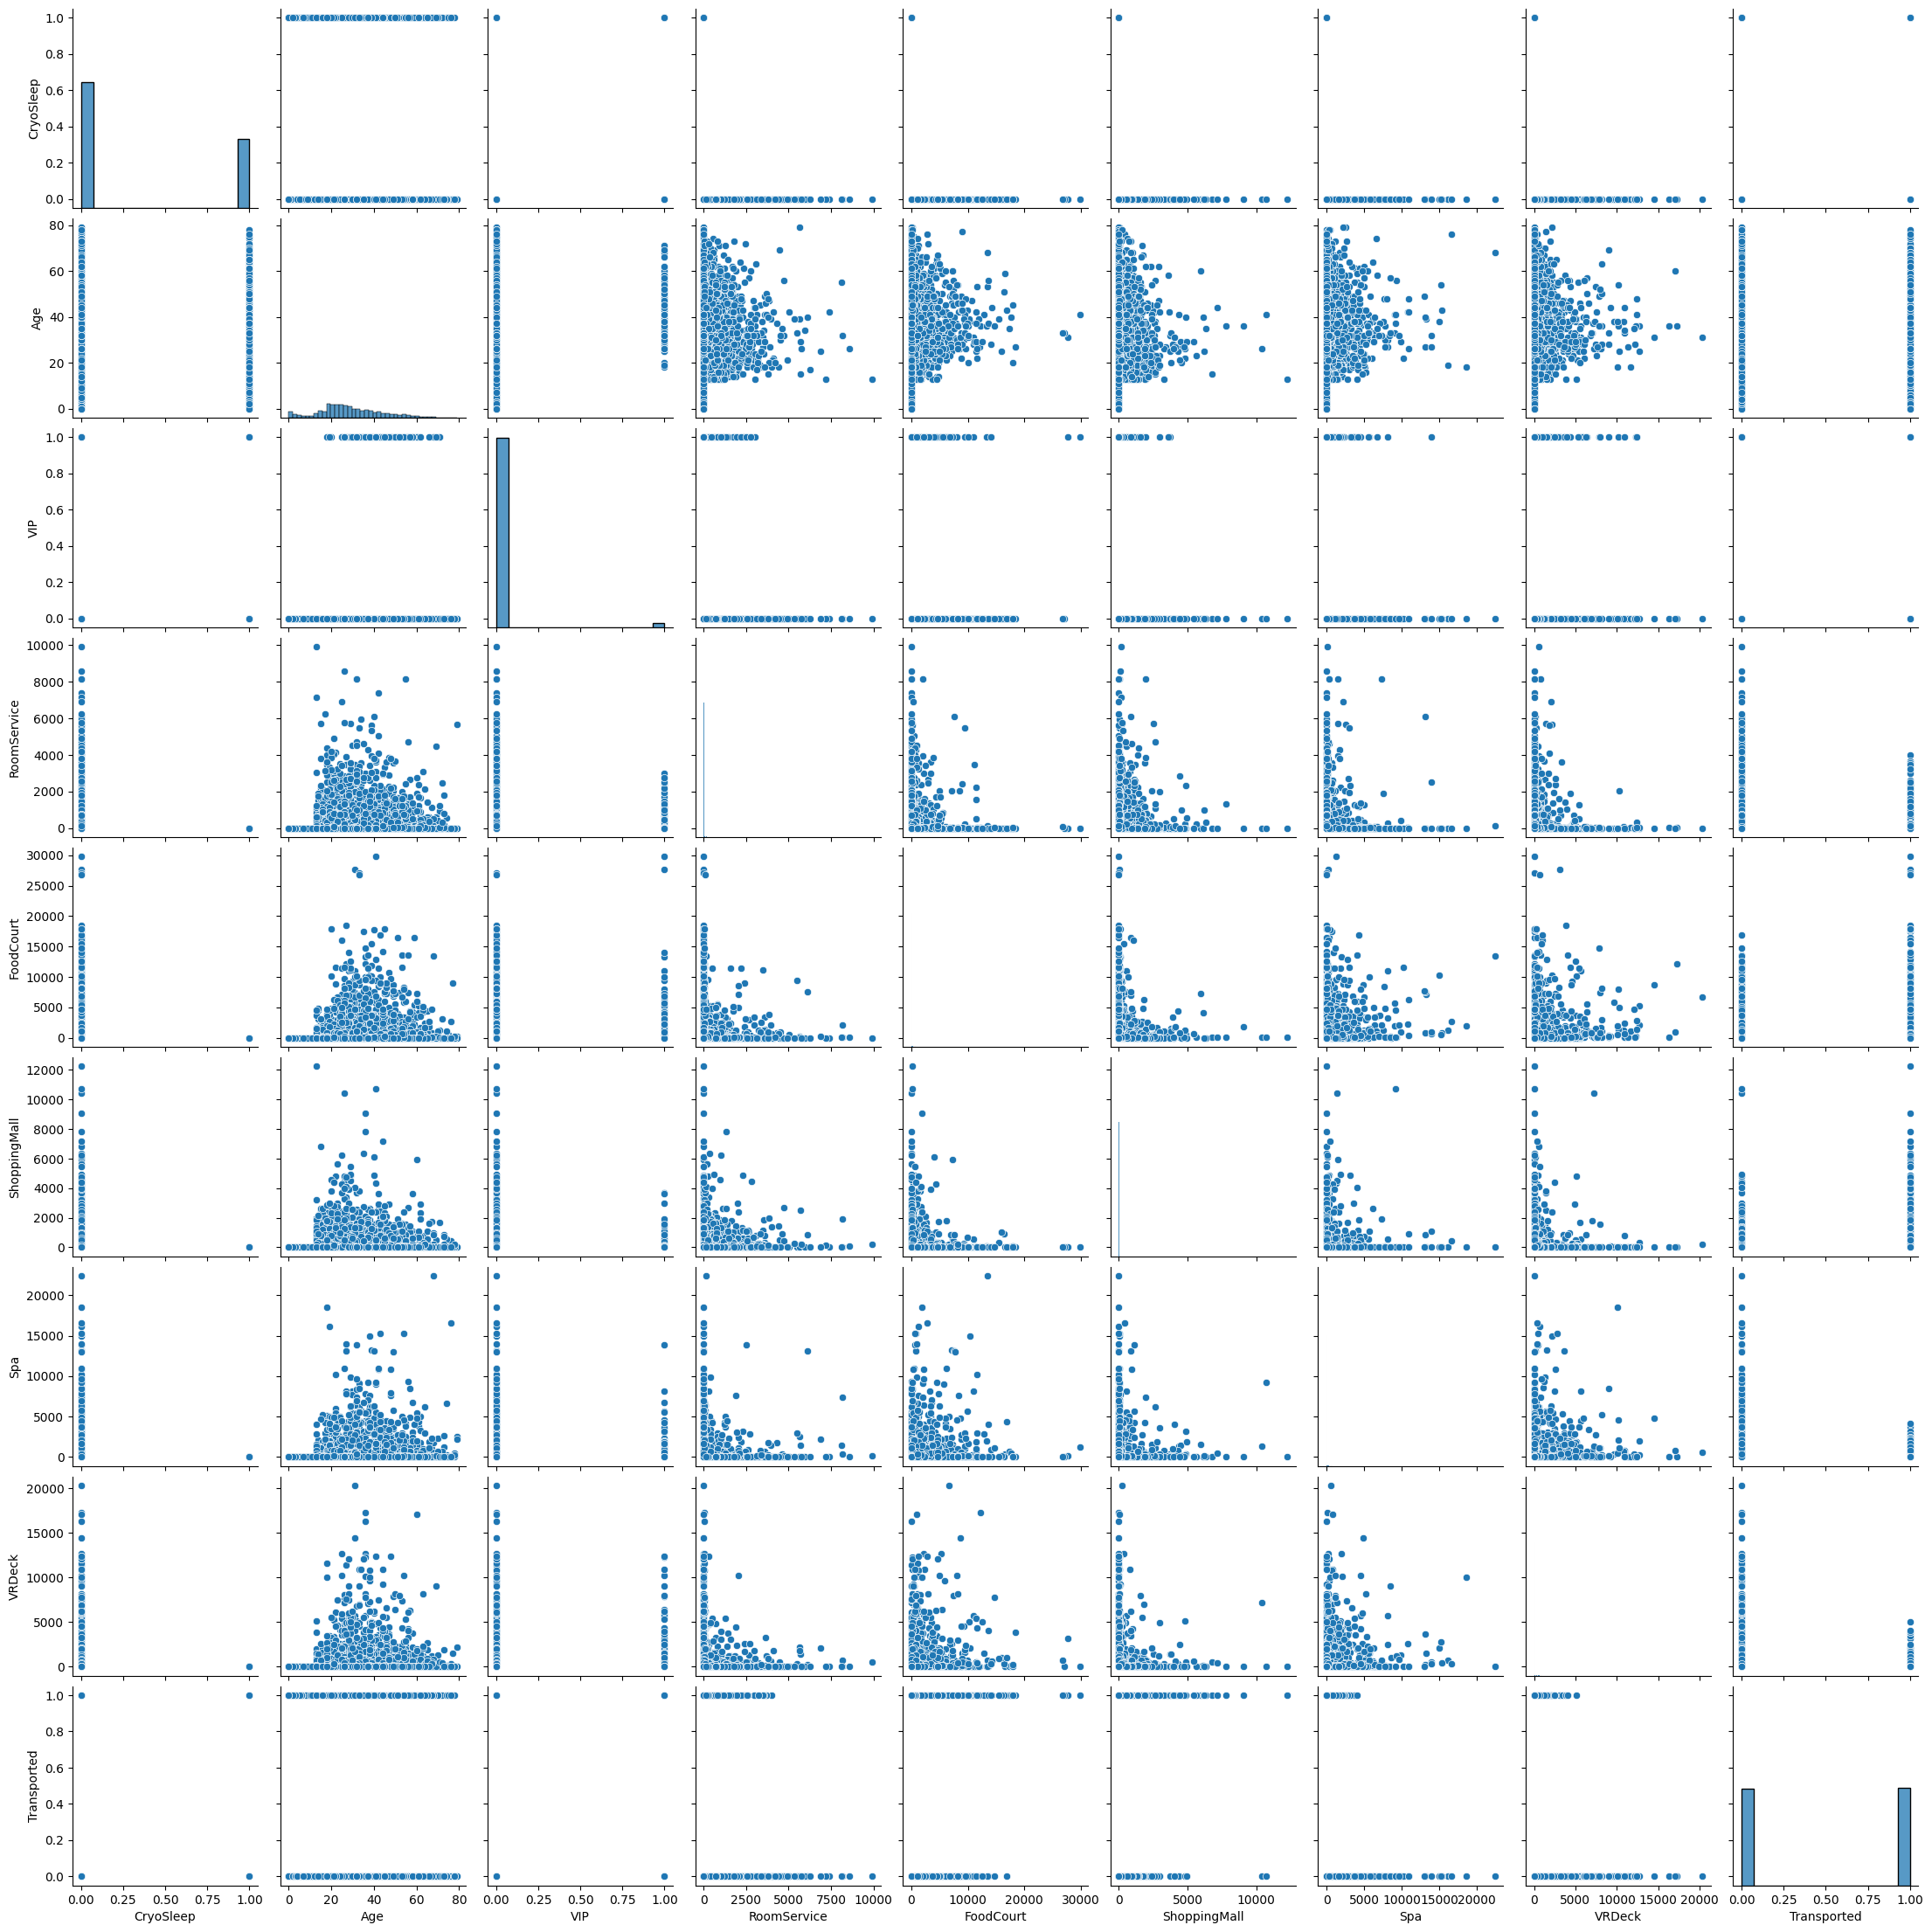

In [12]:
# df_dropped = df.drop(['PassengerId'], axis=1)
sns.pairplot(df_dropna)

In [89]:
# 不需要
import math
def to_int(x):
    if math.isnan(x): return x
    return np.int64(x)
to_numeric_cols = ['CryoSleep', 'VIP']
for col in to_numeric_cols:
    df[col] = df[col].apply(to_int)

In [5]:
df_dropna.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

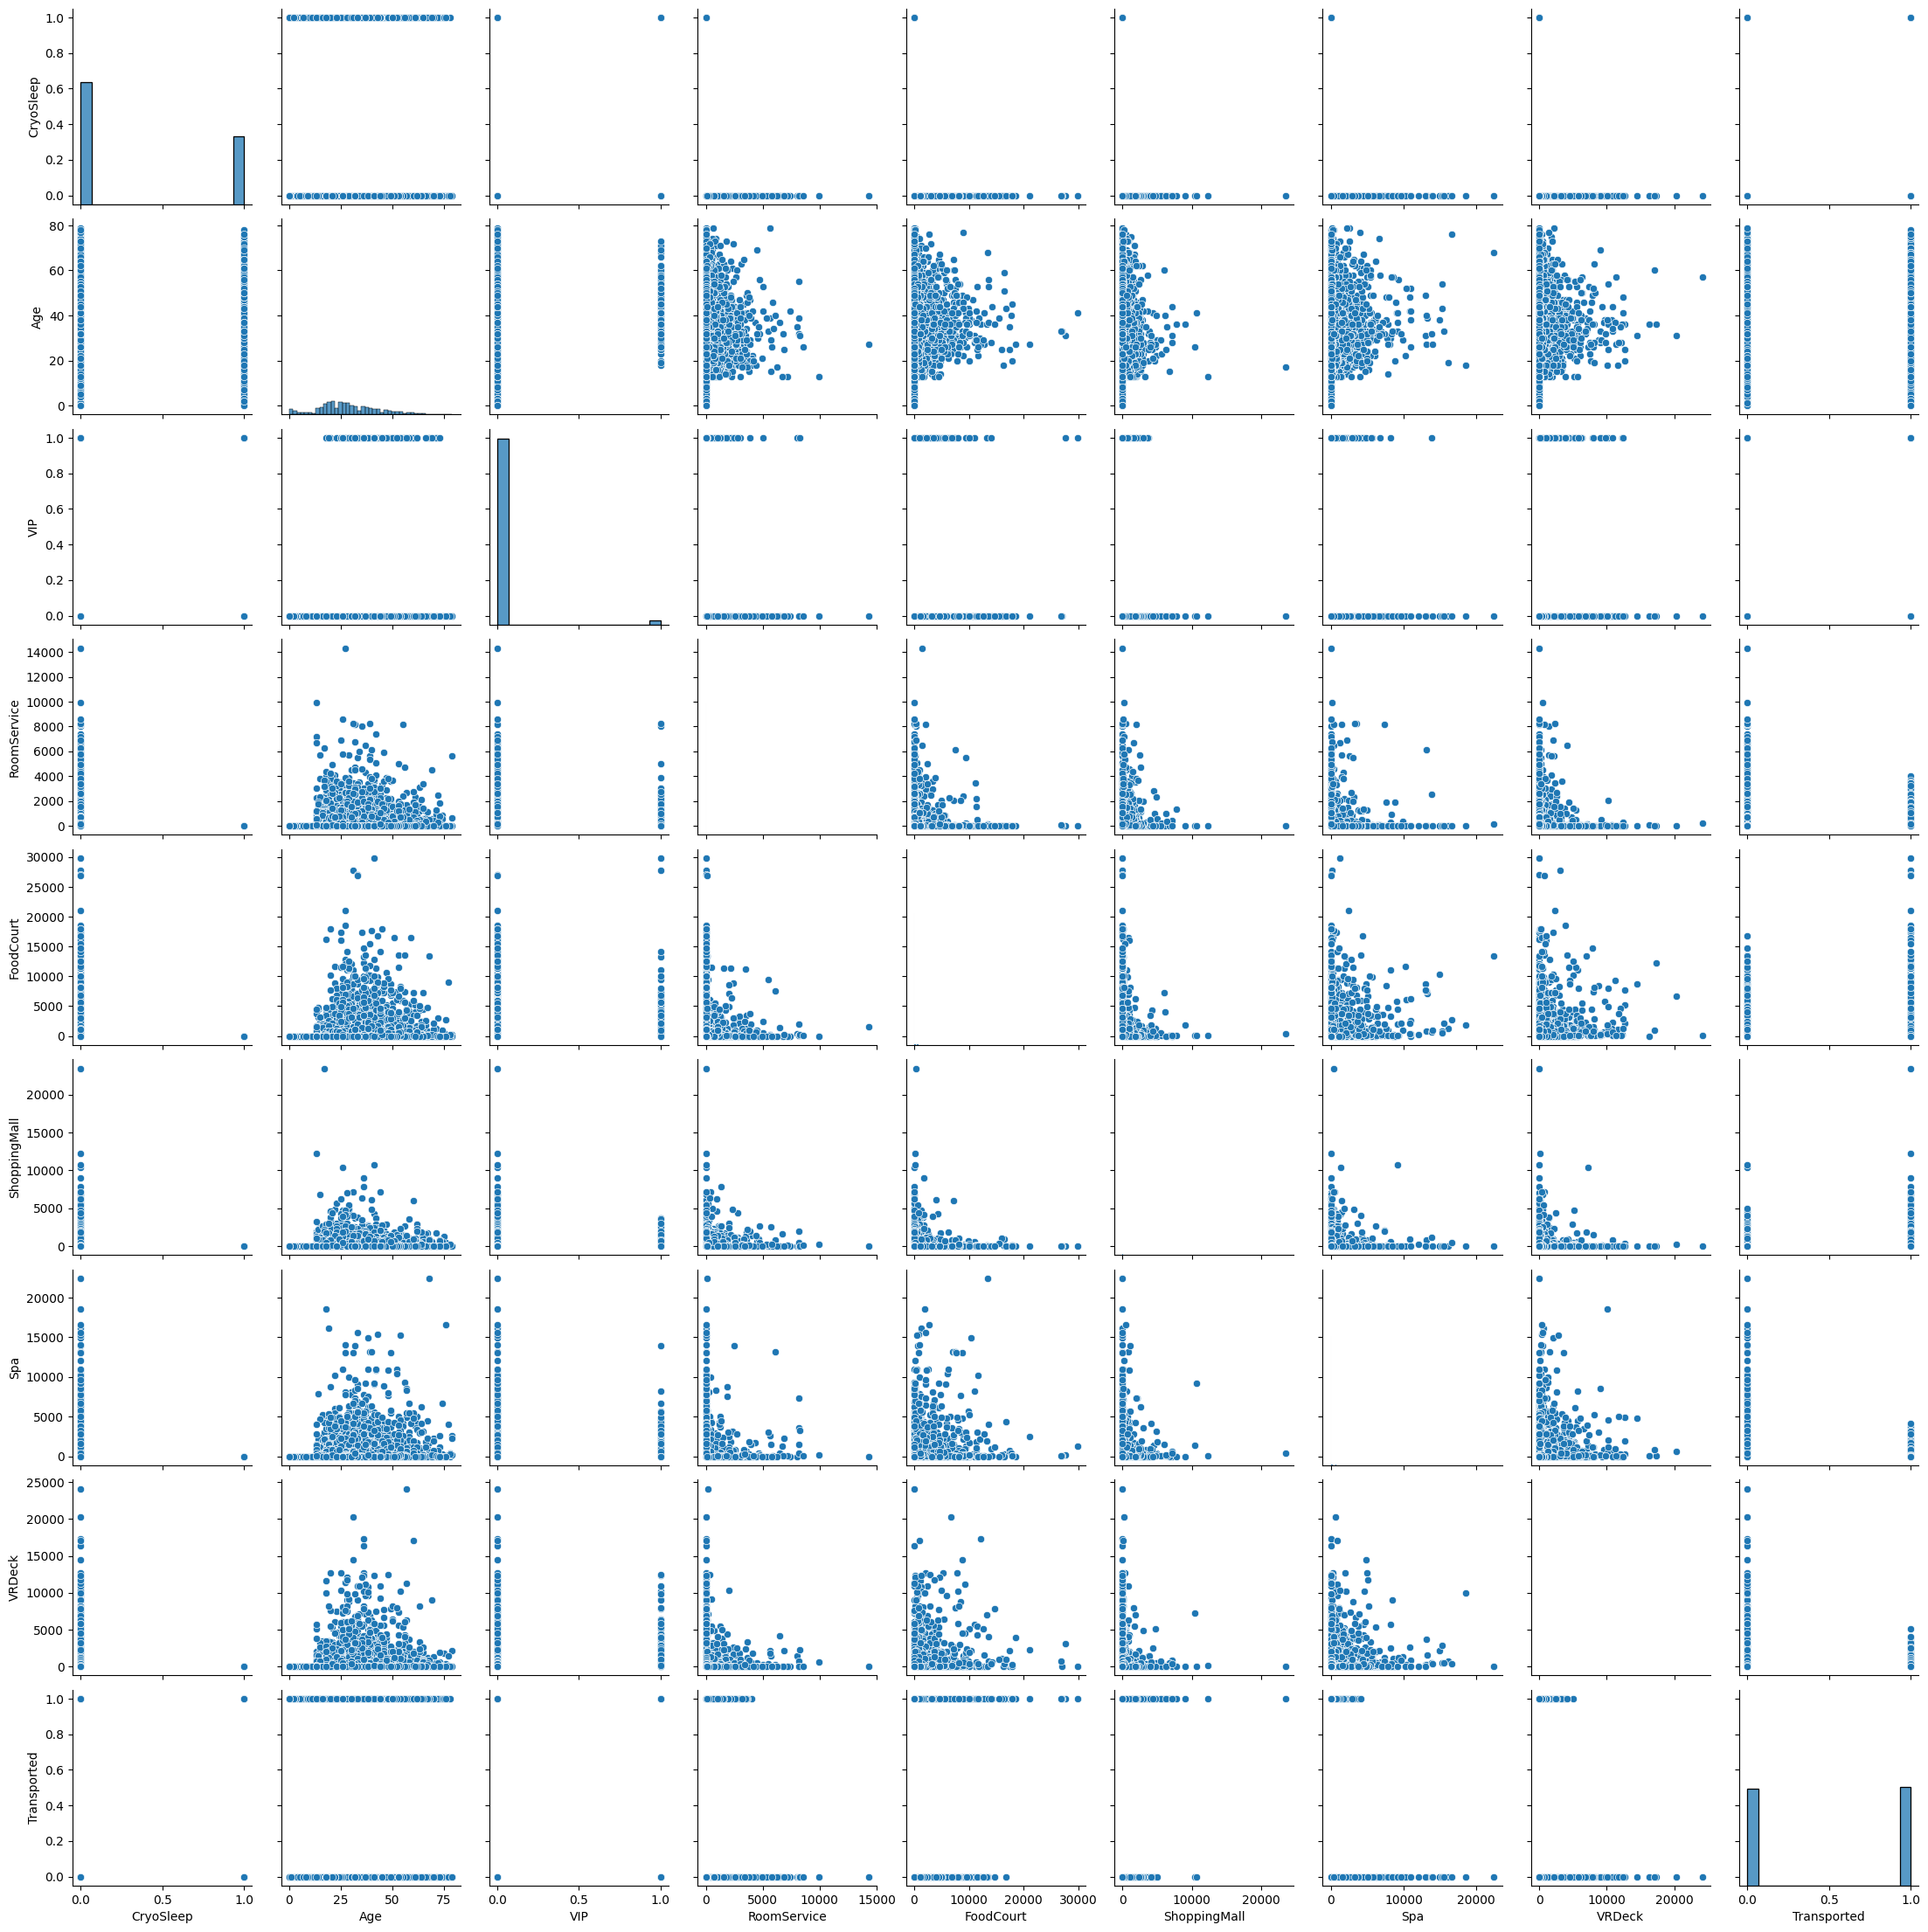

In [113]:
sns.pairplot(df, dropna=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bool1    5 non-null      bool   
 1   bool2    5 non-null      bool   
 2   number1  5 non-null      int32  
 3   number2  5 non-null      float64
 4   string1  5 non-null      object 
dtypes: bool(2), float64(1), int32(1), object(1)
memory usage: 238.0+ bytes


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


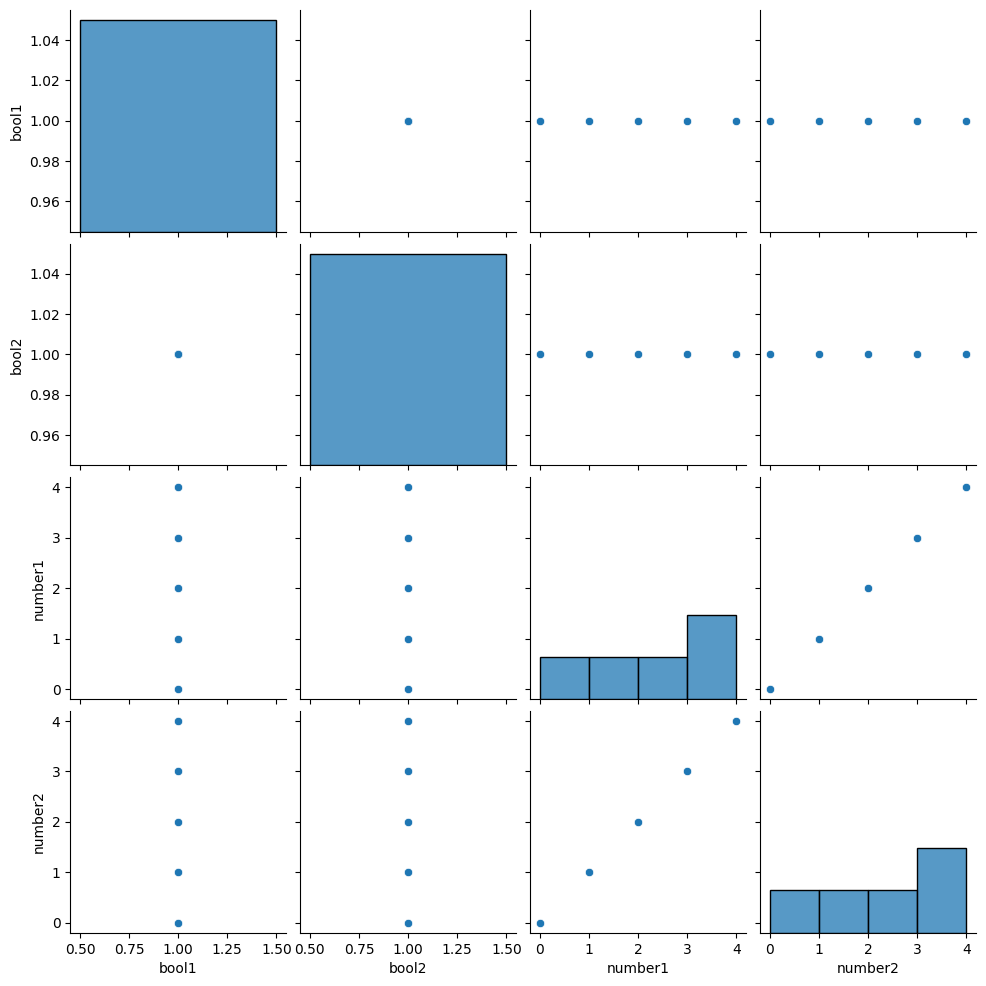

In [112]:
nr = 5
bool_array = np.ones(nr, dtype=bool)
number_array = np.arange(nr)
bool_array[0] = np.nan
s1 = pd.Series(bool_array)
s2 = pd.Series(bool_array)
s3 = pd.Series(number_array)
s4 = pd.Series(number_array.astype(np.float64))
s5 = pd.Series(['a', 'b', 'c', 'd', 'e'])
frame = {
    'bool1':s1,
    'bool2':s2,
    'number1':s3,
    'number2':s4,
    'string1':s5
}
df_test = pd.DataFrame(frame)
df_test
df_test.info()
sns.pairplot(df_test)

# Data Preprocessing
* deal with missing value
    * fill them with `average`, `median`, `distribution`, `zero`, etc.
    * discard
* encode categorical features
    * one-hot encoding
    * frequence encoding
    * others
* standarization
* feature selection
    * filter methods
    * wrapper methods
    * embedded methods
* dimensional reduction

### filling missing values
* numeric features: fill them with `median`
* categorical features: fill them with `most_frequent`

In [7]:
# 再次列出所有的feature
ncols = df.shape[1]
numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
is_numeric_cols = [True if df.columns[i] in numeric_cols else False for i in range(ncols)]
print(numeric_cols)
print(df.columns)
print(is_numeric_cols) # correct

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
[False, False, False, False, False, True, False, True, True, True, True, True, False, False]


In [10]:
df_stat

,data types,Missing,unique
PassengerId,object,0,8693
HomePlanet,object,201,3
CryoSleep,object,217,2
Cabin,object,199,6560
Destination,object,182,3
Age,float64,179,80
VIP,object,203,2
RoomService,float64,181,1273
FoodCourt,float64,183,1507
ShoppingMall,float64,208,1115


In [11]:
# name, passengerId 可以先丟掉
df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_most = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for (i, col) in enumerate(df.columns):
    if is_numeric_cols[i]:
        df[col] = imp_median.fit_transform(df[col].values.reshape(-1,1))[:,0]
        # imp_median.fit(df[col])
        # imp_median.transform(df[col])
    else:
        df[col] = imp_most.fit_transform(df[col].values.reshape(-1,1))[:,0]
        # imp_most.fit(df[col])
        # imp_most.transform(df[imp_most])

# from sklearn.impute import SimpleImputer
 
# imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
# dfstd.gender = imputer.fit_transform(dfstd['gender'].values.reshape(-1,1))[:,0]
# dfstd

In [13]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [56]:
# test for filling missing values  with SimpleImputer
students = [[85, 'M', 'verygood'],
           [95, 'F', 'excellent'],
           [75, None,'good'],
           [np.NaN, 'M', 'average'],
           [70, 'M', 'good'],
           [np.NaN, None, 'verygood'],
           [92, 'F', 'verygood'],
           [98, 'M', 'excellent']]
dfstd = pd.DataFrame(students)

dfstd.columns = ['marks', 'gender', 'result']
#
# Missing values is represented using NaN and hence specified. If it
# is empty field, missing values will be specified as ''
#
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
dfstd = imputer.fit_transform(dfstd['marks'].values.reshape(-1,1))
dfstd
dfstd[:, 0]

array([85.        , 95.        , 75.        , 85.83333333, 70.        ,
       85.83333333, 92.        , 98.        ])

### encode categorical features
Because number of categories less than 10, we can use one-hot encoding

In [15]:
df.drop(['Cabin'], axis=1, inplace=True)

In [29]:
df_dummies = df.copy()
df_dummies['CryoSleep'] = df_dummies['CryoSleep'].astype(np.int64)
df_dummies = pd.get_dummies(df_dummies)
df_dummies.drop(['HomePlanet_Mars', 'Destination_TRAPPIST-1e'], axis=1, inplace=True)
df_dummies

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_PSO J318.5-22
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1,0,0,0
2,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,0,0
3,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,0,0
4,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,0,1,1,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
8690,0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,1,0,0,0
8691,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,0,1,1,0


In [ ]:
df_dummies['CryoSleep']

In [20]:
cols = ['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e']
for col in cols:
    df_dummies[col] = df_dummies[col].astype(np.int64)

<Axes: >

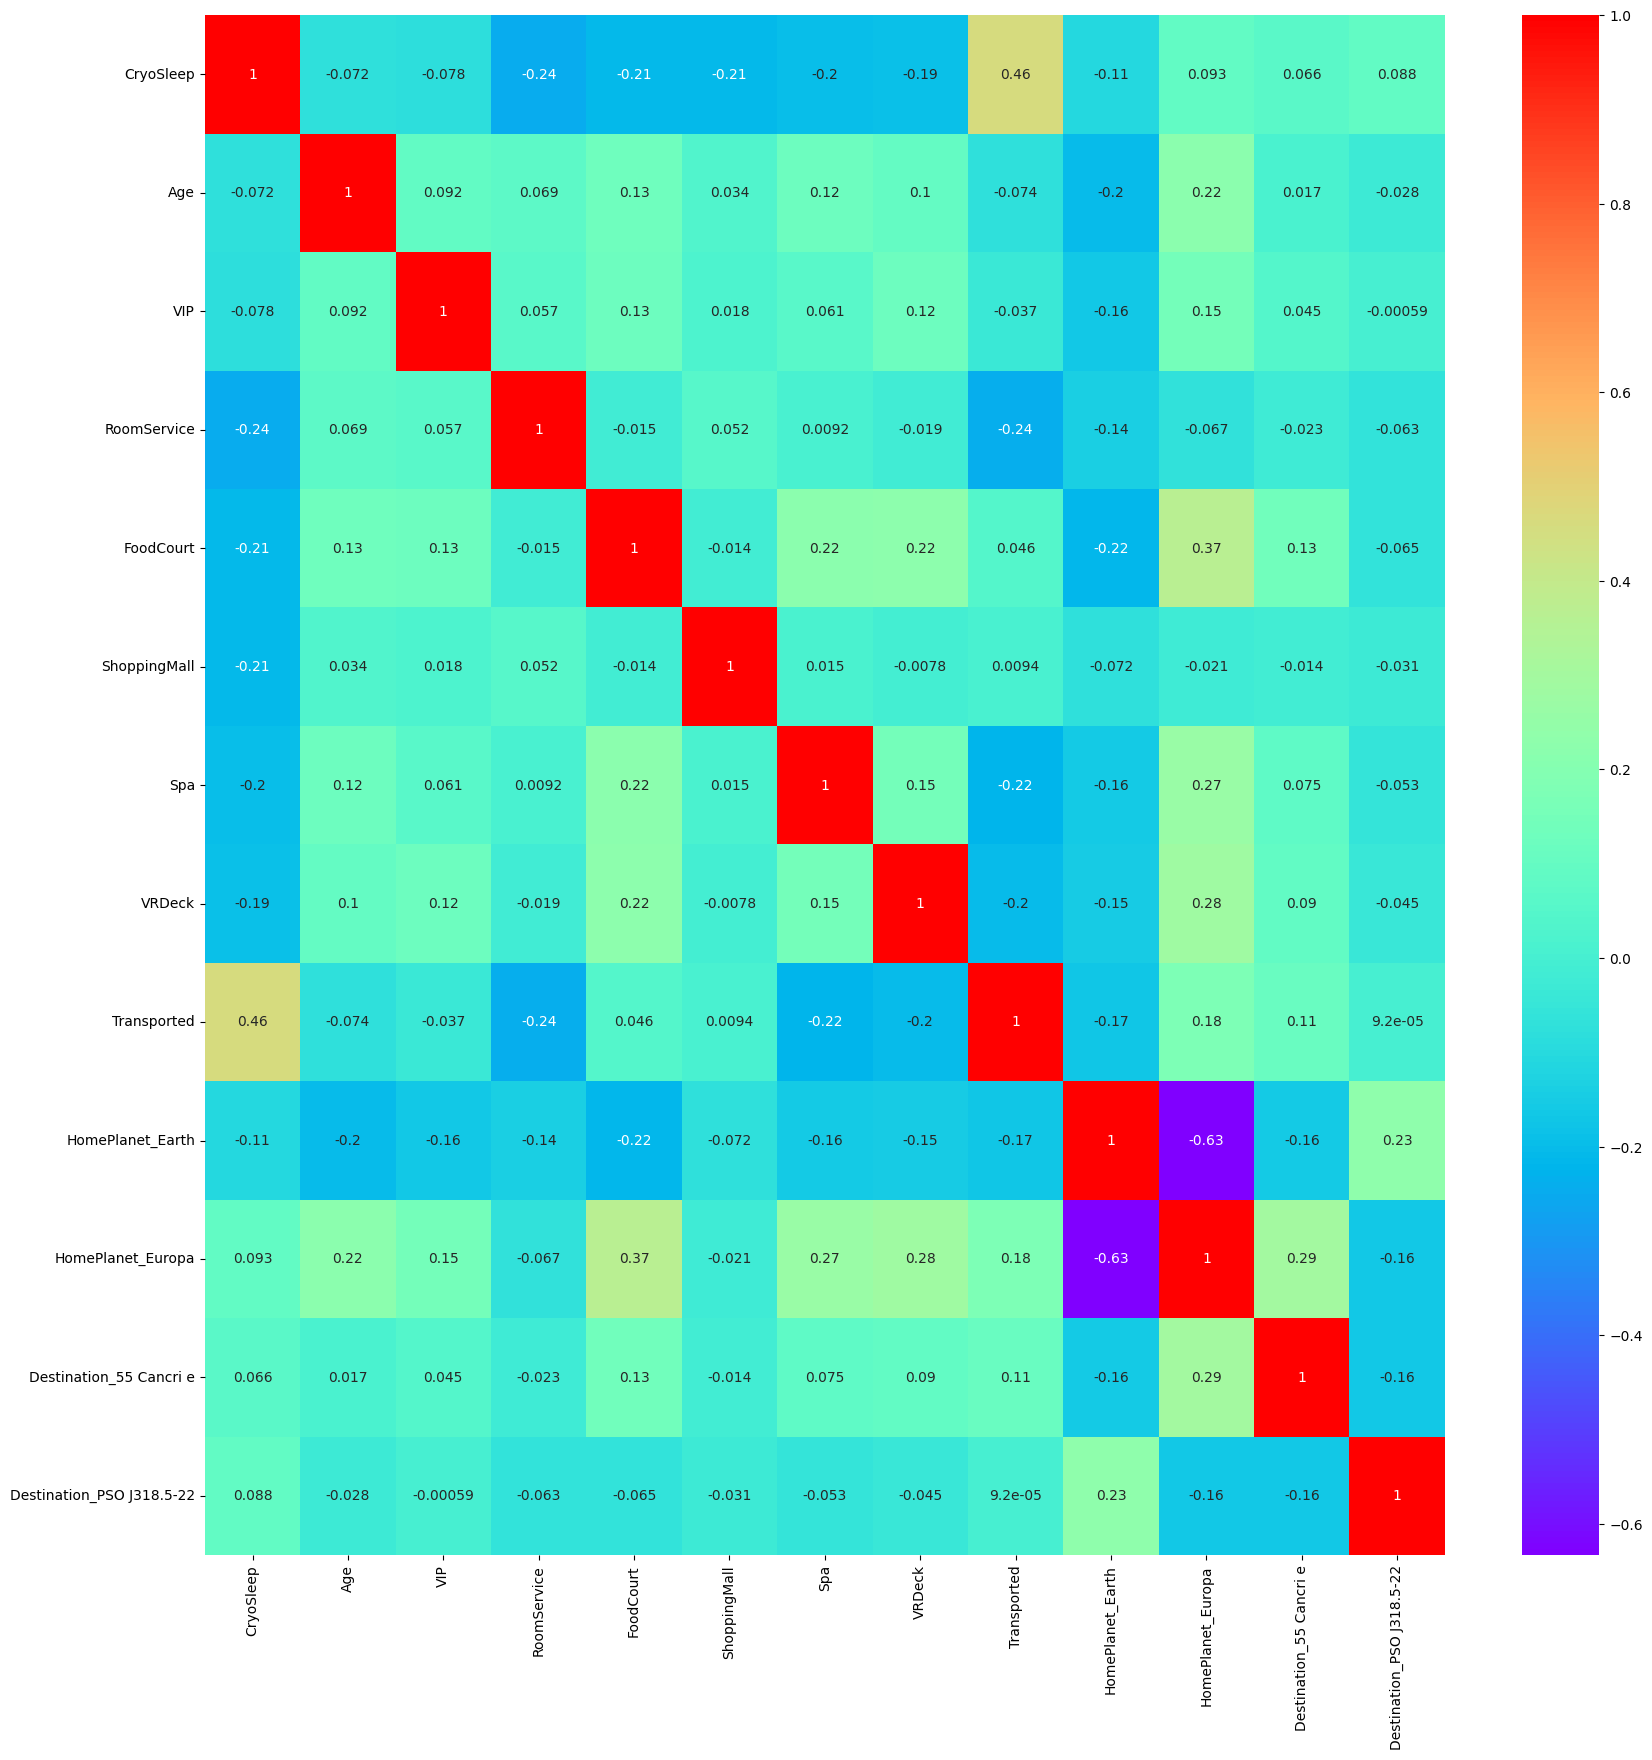

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummies.corr(), annot=True, cmap='rainbow')

### standarization

In [34]:
df_dummies.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_PSO J318.5-22
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1,0,0,0
2,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,0,0
3,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,0,0
4,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,0,0


In [39]:
from sklearn.preprocessing import StandardScaler
cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
df_dummies.loc[:,cols] = StandardScaler().fit_transform(df_dummies.loc[:,cols])

In [40]:
df_dummies.loc[:,cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.715553,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
1,-0.329408,-0.168073,-0.275387,-0.241771,0.217158,-0.224205
2,2.039169,-0.268001,1.959998,-0.283579,5.695623,-0.219796
3,0.297569,-0.333105,0.523010,0.336851,2.687176,-0.092818
4,-0.886720,0.125652,-0.237159,-0.031059,0.231374,-0.261240
...,...,...,...,...,...,...
8688,0.854881,-0.333105,3.992336,-0.283579,1.189173,-0.197751
8689,-0.747392,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
8690,-0.190079,-0.333105,-0.281027,2.846999,-0.269737,-0.263003
8691,0.227905,-0.333105,0.376365,-0.283579,0.043013,2.589576


# train
model:
* xgboost 
* random forest
* knn
* svm

### baseline

In [69]:
df_dropna.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [53]:
try:
    df_dropna.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)
except:
    pass
data, target = df_dropna.drop(['Transported'], axis=1), df_dropna['Transported']

C:\Users\User\AppData\Local\Temp\ipykernel_7620\3414334837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)


In [77]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(tree_method="hist", enable_categorical=True)
data_copy = df_dropna.copy()
cat_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep', 'Transported']
data_copy[cat_cols] = data_copy[cat_cols].astype('category')
data_copy.info()
data, target = data_copy.drop(['Transported'],axis=1), data_copy['Transported']
train_X, test_X, train_Y, test_Y = train_test_split(data, target, random_state=42)
xgboost_classifier.fit(train_X, train_Y)
xgboost_classifier.score(train_X, train_Y)
print(train_X.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    6606 non-null   category
 1   CryoSleep     6606 non-null   category
 2   Destination   6606 non-null   category
 3   Age           6606 non-null   float64 
 4   VIP           6606 non-null   category
 5   RoomService   6606 non-null   float64 
 6   FoodCourt     6606 non-null   float64 
 7   ShoppingMall  6606 non-null   float64 
 8   Spa           6606 non-null   float64 
 9   VRDeck        6606 non-null   float64 
 10  Transported   6606 non-null   category
dtypes: category(5), float64(6)
memory usage: 394.0 KB
(4954, 10)


In [72]:
train_X.shape

(4954, 10)

In [80]:
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
data_copy = pd.get_dummies(df_dropna.copy())
data, target = data_copy.drop(['Transported'], axis=1), data_copy['Transported']
train_X, test_X, train_Y, test_Y = train_test_split(data, target, random_state=42)
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc.fit(train_X, train_Y)
knn.fit(train_X, train_Y)
lr.fit(train_X, train_Y)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.__class__

xgboost.sklearn.XGBClassifier

In [78]:
# baseline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def score(model, x_train, y_train, x_test = None, y_test = None, train=True):
    if train:
        pred = model.predict(x_train)
        print('Train Result:\n')
        result = {
            'acc': accuracy_score(y_train, pred),
            'precision': precision_score(y_train, pred),
            'recall': recall_score(y_train, pred),
            'F1': f1_score(y_train, pred),
            'confusion matrix':confusion_matrix(y_train, pred)
        }
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred = model.predict(x_test)
        print('Test Result:\n')
        result = {
            'acc': accuracy_score(y_train, pred),
            'precision': precision_score(y_train, pred),
            'recall': recall_score(y_train, pred),
            'F1': f1_score(y_train, pred),
            'confusion matrix':confusion_matrix(y_train, pred)
        }
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")
    
    return pd.Series(result)
# print('trainning baseline:')


In [79]:
print(train_X.shape)
result = score(xgboost_classifier, train_X, train_Y)

(4954, 10)
Train Result:

Accuracy Score: 90.19%
Precision Score: 87.41%
Recall Score: 94.01%
F1 score: 90.59%
Confusion Matrix:
 [[2129  337]
 [ 149 2339]]


In [57]:
result

NameError: name 'result' is not defined

In [81]:
svc_result = score(svc, train_X, train_Y)
knn_result = score(knn, train_X, train_Y)
lr_result = score(lr, train_X, train_Y)

Train Result:

Accuracy Score: 79.47%
Precision Score: 75.16%
Recall Score: 88.30%
F1 score: 81.20%
Confusion Matrix:
 [[1740  726]
 [ 291 2197]]
Train Result:

Accuracy Score: 82.34%
Precision Score: 82.48%
Recall Score: 82.32%
F1 score: 82.40%
Confusion Matrix:
 [[2031  435]
 [ 440 2048]]
Train Result:

Accuracy Score: 78.83%
Precision Score: 78.03%
Recall Score: 80.51%
F1 score: 79.25%
Confusion Matrix:
 [[1902  564]
 [ 485 2003]]


In [82]:
svc_result

acc                                   0.794711
precision                             0.751625
recall                                0.883039
F1                                     0.81205
confusion matrix    [[1740, 726], [291, 2197]]
dtype: object

In [83]:
knn_result

acc                                   0.823375
precision                             0.824809
recall                                0.823151
F1                                    0.823979
confusion matrix    [[2031, 435], [440, 2048]]
dtype: object

In [84]:
lr_result

acc                                   0.788252
precision                             0.780288
recall                                0.805064
F1                                    0.792483
confusion matrix    [[1902, 564], [485, 2003]]
dtype: object

In [89]:
baseline = pd.DataFrame([result, svc_result, knn_result, lr_result], index=['xgboost', 'svc', 'knn', 'lr'])

### after Data Preprocessing

In [93]:
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
xgboost_classifier = XGBClassifier(tree_method="hist")
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()

data, target = df_dummies.drop(['Transported'], axis=1), df_dummies['Transported']
train_X, test_X, train_Y, test_Y = train_test_split(data, target, random_state=42)

In [96]:
xgboost_classifier.fit(train_X, train_Y)
svc.fit(train_X, train_Y)
knn.fit(train_X, train_Y)
lr.fit(train_X, train_Y)
tuned_xgb = score(xgboost_classifier, train_X, train_Y)
tuned_svc = score(svc, train_X, train_Y)
tuned_knn = score(knn, train_X, train_Y)
tuned_lr = score(lr, train_X, train_Y)

Train Result:

Accuracy Score: 88.66%
Precision Score: 86.92%
Recall Score: 91.24%
F1 score: 89.03%
Confusion Matrix:
 [[2782  451]
 [ 288 2998]]
Train Result:

Accuracy Score: 79.63%
Precision Score: 79.22%
Recall Score: 80.77%
F1 score: 79.99%
Confusion Matrix:
 [[2537  696]
 [ 632 2654]]
Train Result:

Accuracy Score: 81.99%
Precision Score: 81.73%
Recall Score: 82.78%
F1 score: 82.25%
Confusion Matrix:
 [[2625  608]
 [ 566 2720]]
Train Result:

Accuracy Score: 79.05%
Precision Score: 78.55%
Recall Score: 80.37%
F1 score: 79.45%
Confusion Matrix:
 [[2512  721]
 [ 645 2641]]


In [49]:
tuned_xgb

acc                                   0.886639
precision                             0.869237
recall                                0.912355
F1                                    0.890275
confusion matrix    [[2782, 451], [288, 2998]]
dtype: object

In [50]:
tuned_svc

acc                                   0.796288
precision                             0.792239
recall                                0.807669
F1                                    0.799879
confusion matrix    [[2537, 696], [632, 2654]]
dtype: object

In [51]:
tuned_knn

acc                                   0.819911
precision                             0.817308
recall                                0.827754
F1                                    0.822498
confusion matrix    [[2625, 608], [566, 2720]]
dtype: object

In [52]:
tuned_lr

acc                                   0.790459
precision                             0.785544
recall                                0.803713
F1                                    0.794525
confusion matrix    [[2512, 721], [645, 2641]]
dtype: object

In [90]:
processed = pd.DataFrame([tuned_xgb, tuned_svc, tuned_knn, tuned_lr], index=['xgboost', 'svc', 'knn', 'lr'])

In [91]:
baseline

,acc,precision,recall,F1,confusion matrix
xgboost,0.901897,0.874066,0.940113,0.905887,"[[2129, 337], [149, 2339]]"
svc,0.794711,0.751625,0.883039,0.812050,"[[1740, 726], [291, 2197]]"
knn,0.823375,0.824809,0.823151,0.823979,"[[2031, 435], [440, 2048]]"
lr,0.788252,0.780288,0.805064,0.792483,"[[1902, 564], [485, 2003]]"


In [92]:
processed

,acc,precision,recall,F1,confusion matrix
xgboost,0.886639,0.869237,0.912355,0.890275,"[[2782, 451], [288, 2998]]"
svc,0.796288,0.792239,0.807669,0.799879,"[[2537, 696], [632, 2654]]"
knn,0.819911,0.817308,0.827754,0.822498,"[[2625, 608], [566, 2720]]"
lr,0.790459,0.785544,0.803713,0.794525,"[[2512, 721], [645, 2641]]"


# validation

In [98]:
xgb_score = score(xgboost_classifier, test_X, test_Y)
svc_score = score(svc, test_X, test_Y)
knn_score = score(knn, test_X, test_Y)
lr_score = score(lr, test_X, test_Y)

Train Result:

Accuracy Score: 77.64%
Precision Score: 76.58%
Recall Score: 79.95%
F1 score: 78.23%
Confusion Matrix:
 [[815 267]
 [219 873]]
Train Result:

Accuracy Score: 78.61%
Precision Score: 77.28%
Recall Score: 81.32%
F1 score: 79.25%
Confusion Matrix:
 [[821 261]
 [204 888]]
Train Result:

Accuracy Score: 77.05%
Precision Score: 76.26%
Recall Score: 78.85%
F1 score: 77.53%
Confusion Matrix:
 [[814 268]
 [231 861]]
Train Result:

Accuracy Score: 77.60%
Precision Score: 76.42%
Recall Score: 80.13%
F1 score: 78.23%
Confusion Matrix:
 [[812 270]
 [217 875]]


In [100]:
test_score = pd.DataFrame([xgb_score, svc_score, knn_score, lr_score], index=['xgboost', 'svc', 'knn', 'lr'])
test_score

,acc,precision,recall,F1,confusion matrix
xgboost,0.776449,0.765789,0.799451,0.782258,"[[815, 267], [219, 873]]"
svc,0.786109,0.772846,0.813187,0.792503,"[[821, 261], [204, 888]]"
knn,0.770469,0.762622,0.788462,0.775326,"[[814, 268], [231, 861]]"
lr,0.775989,0.764192,0.801282,0.782298,"[[812, 270], [217, 875]]"


# export model